# Introduction to the shaker table experimental datasets

## Experimental test structure
Acceleration data was collected from a 12-storey reinforced concrete frame model on a shaking table subjected to simulated earthquake loading. A schematic of the structure is shown below.<br>

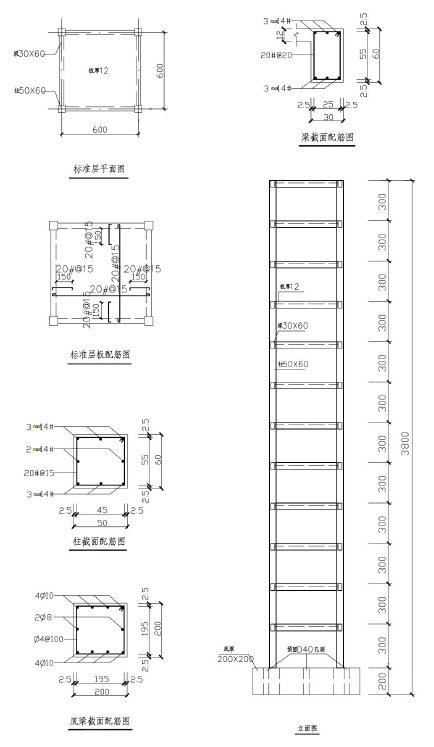


## Sensor network
Accelerometers were located at the locations shown in the schematic below.

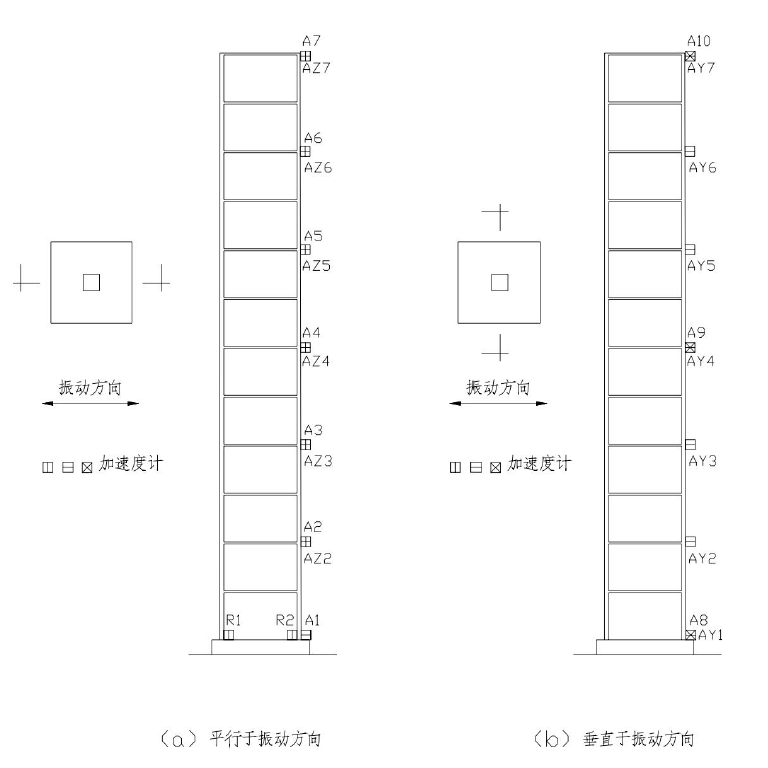

## Test regime
Data was collected from the accelerometers as the frame model was subjected to a variety of characteristic earthquake excitations via the shaking table. All data was sampled at XXXHz and is recorded in units of gravity (g). Tests were repeated with various peak exitation amplitudes to test the strength of the structure and track how damage propogates within the structure.

## Structural damage history
During the testing, damage propogates ....

## Accessing the data
The data is presented here as a list of dictionaires. 

We'll start by loading in some commonly used Python modules we need for processing and plotting the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import urllib  # the lib that handles the url stuff
from scipy.signal import welch


### Loading shaker table data

Now let's load the data from GitHub. This data is stored as a list of dictionaries. The code below loads the data and converts it to a nested dictionary.

In [2]:
url = "https://raw.githubusercontent.com/zwynne/EDACAB/main/Chongqing_data/Part_Sensor_record_data_data.txt"


data = urllib.request.urlopen(url).readlines() # it's a file like object and works just like a file

dat = list(map(json.loads, data))[0]

unique_conditions = np.unique([i['Working condition'] for i in dat])
dat0 = {}

for i in range(len(unique_conditions)):
    tmp = {}
    for entry in dat:
        if entry['Working condition']==unique_conditions[i]:
            tmp['Measuring point: '+entry['Measuring point']]=entry
    dat0['Working condition: '+unique_conditions[i]]=tmp
    del(entry,tmp)
del(i,dat,unique_conditions)

### Exploring the shaker table data
Let's see what working conditions are included.

In [3]:
working_conditions = list(dat0.keys())
print(working_conditions)

['Working condition: e1', 'Working condition: e2', 'Working condition: e3', 'Working condition: e4']


We'll check which measuing points we have for one of the working conditions.

In [4]:
measuring_points = list(dat0['Working condition: e1'].keys())
print(measuring_points)

['Measuring point: A10', 'Measuring point: A1', 'Measuring point: A2', 'Measuring point: A3', 'Measuring point: A4', 'Measuring point: A5', 'Measuring point: A6', 'Measuring point: A7', 'Measuring point: A8', 'Measuring point: A9', 'Measuring point: AY1', 'Measuring point: AY2', 'Measuring point: AY3', 'Measuring point: AY4', 'Measuring point: AY5', 'Measuring point: AY6', 'Measuring point: AY7', 'Measuring point: AZ2', 'Measuring point: AZ3', 'Measuring point: AZ4', 'Measuring point: AZ5', 'Measuring point: AZ6', 'Measuring point: AZ7', 'Measuring point: E11', 'Measuring point: E12', 'Measuring point: E13', 'Measuring point: E14', 'Measuring point: E15', 'Measuring point: E16', 'Measuring point: E17', 'Measuring point: E18', 'Measuring point: R1', 'Measuring point: R2']


### Plotting shaker table data

Now let's plot all the Z direction measuring points measured responses alongside their Welch Power Spectral Density!

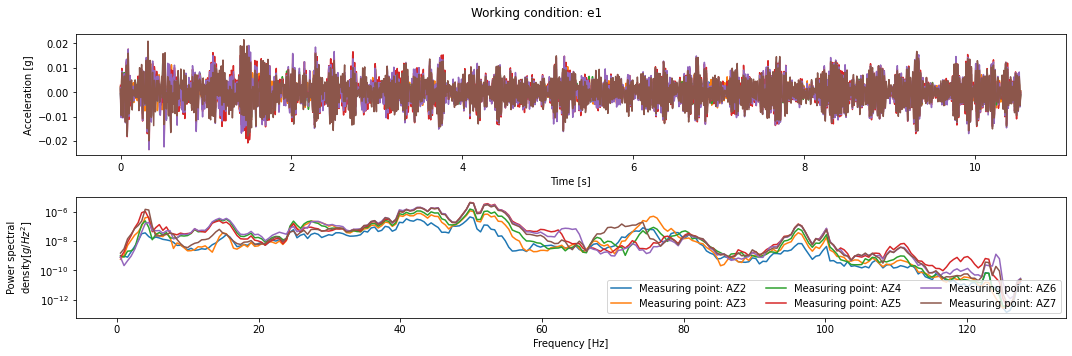

In [5]:
condition = 'Working condition: e1'

fg,ax = plt.subplots(2,figsize=(15,5))
for channel in measuring_points:
    f,psd = welch(dat0[condition][channel]['Acceleration'],fs=255.1,nperseg=512)
    channel_name = channel.split()[-1]
    if "Z" in channel_name:
        ax[0].plot(dat0[condition][channel]['Time [s]'],dat0[condition][channel]['Acceleration'],label=channel)
        ax[1].semilogy(f[1:],psd[1:],label=channel)
ax[0].set_ylabel('Acceleration [g]')
ax[1].set_ylabel('Power spectral\ndensity[$g/Hz^2$]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(loc=4,ncol=3)
fg.suptitle(condition)
fg.tight_layout()